### Importing Dataset and Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DiamondPrice=pd.read_csv("DiamondPricesData.csv")
DiamondPrice.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [3]:
print(DiamondPrice.duplicated().shape)
DiamondPrice.drop_duplicates(inplace=True)


(53940,)


<h4>Variables Analysis</h4>
* Target :"Price" <br>
* Predictors :'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z'

<h4>Looking for distribution of <b>target</b></h4>

<AxesSubplot:>

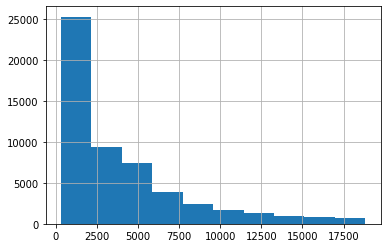

In [4]:
%matplotlib inline
DiamondPrice['price'].hist()

<AxesSubplot:ylabel='Frequency'>

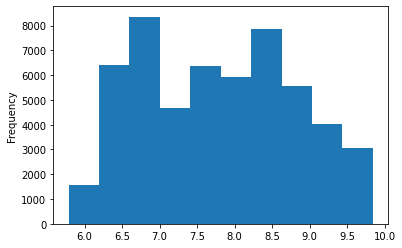

In [5]:
np.log(DiamondPrice['price']).plot(kind='hist')

In [6]:
# Pending Treatment


#### Data Exploration

In [7]:
print(DiamondPrice.head(),'\n')
print('\n',DiamondPrice.info(),DiamondPrice.describe(include='all'),'\n',DiamondPrice.nunique(),sep='\n')


   price  carat      cut color clarity  depth  table     x     y     z
0    326   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
1    326   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
2    327   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31
3    334   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
4    335   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53794 non-null  int64  
 1   carat    53794 non-null  float64
 2   cut      53794 non-null  object 
 3   color    53788 non-null  object 
 4   clarity  53794 non-null  object 
 5   depth    53780 non-null  float64
 6   table    53794 non-null  float64
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes:

### Variables analysis
* Target :price
* Categorical : cut,color,clarity
* continous : carat,depth,table,x,y,z

### Univariate Analysis

* Categorical

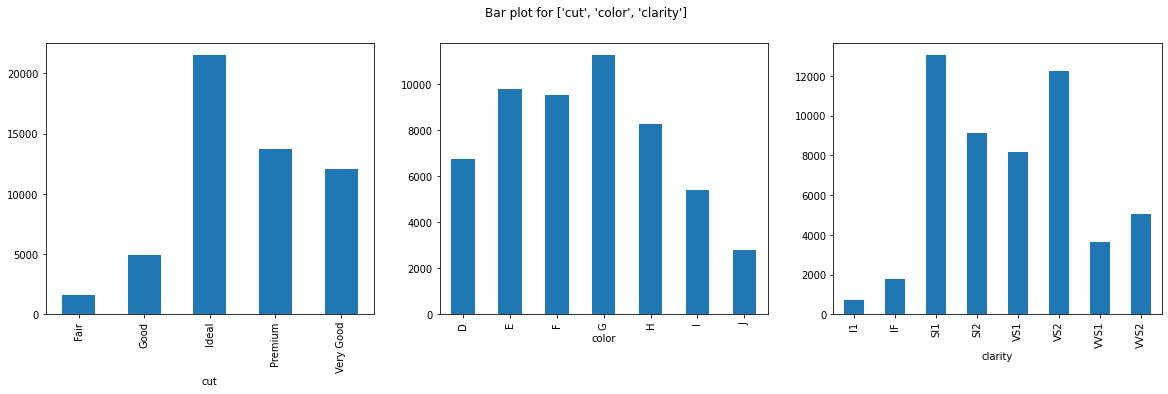

In [8]:
def plot_bar(df,cols):
    %matplotlib inline
    fig,subplot=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
    fig.suptitle("Bar plot for "+str(cols))
    
    for i,j in zip(cols,range(len(cols))):
        df.groupby(i).size().plot(kind='bar',ax=subplot[j])

plot_bar(DiamondPrice,['cut','color','clarity'])
    

* Continous

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>]], dtype=object)

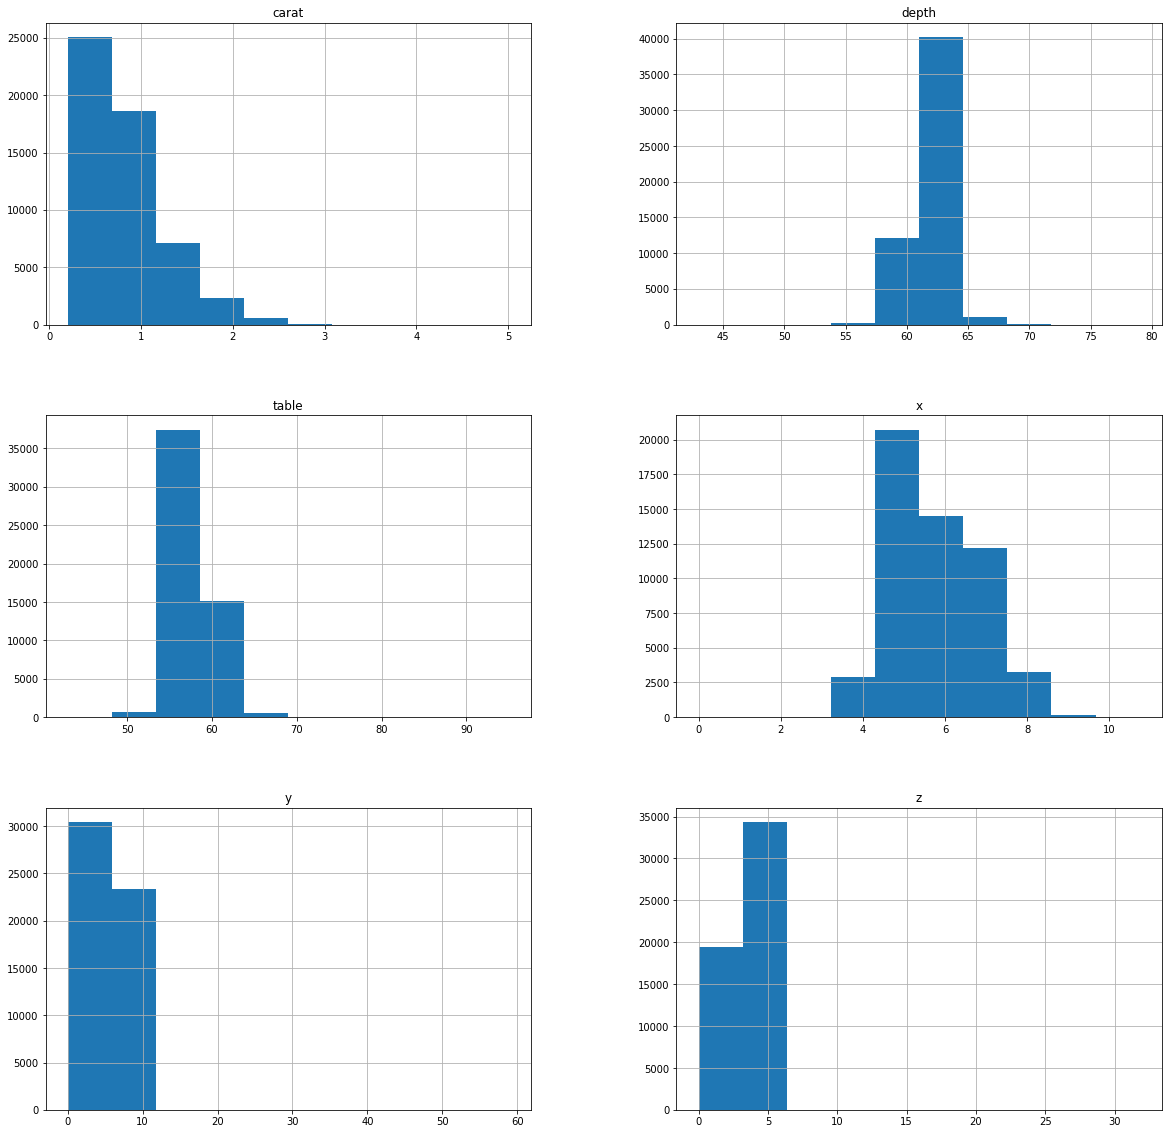

In [9]:
DiamondPrice.hist(['carat','depth','table','x','y','z'],figsize=(20,20))

In [10]:
DiamondPrice[['carat','depth','table','x','y','z']].describe()

,carat,depth,table,x,y,z
count,53794.00000,53780.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748154,57.458109,5.731214,5.734653,3.538714
std,0.47339,1.429948,2.233679,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,10.740000,58.900000,31.800000


<AxesSubplot:>

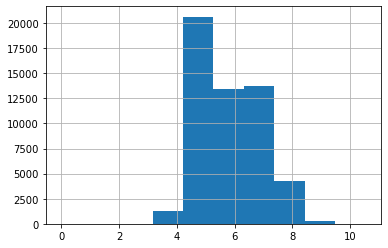

In [4]:
DiamondPrice[DiamondPrice['y']<20]['y'].sort_values(ascending=False)
DiamondPrice['y'][DiamondPrice['y']>20]=10.54
DiamondPrice['y'].hist()

<AxesSubplot:>

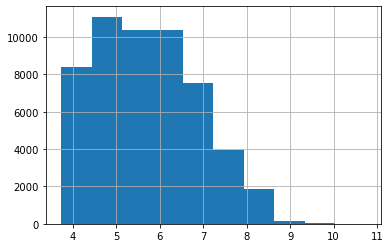

In [5]:
DiamondPrice['x'][DiamondPrice['x']<2]=3.73
DiamondPrice['x'].hist()



<AxesSubplot:>

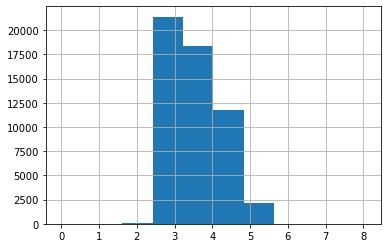

In [7]:
DiamondPrice['z'][DiamondPrice['z']>10]=8.06
DiamondPrice['z'].hist()

#### Fetching Null Values

<AxesSubplot:>

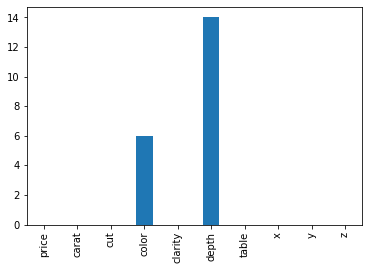

In [14]:
DiamondPrice.isna().sum().plot(kind='bar')

* Rplacing Null Values By Logical Business Values:-
     * Categorical :- Mode
     * Continuous :- Median

In [8]:
DiamondPrice['depth'].fillna(value=DiamondPrice['depth'].median(),inplace=True)
DiamondPrice['color'].fillna(value=DiamondPrice['color'].mode()[0],inplace=True)

In [16]:
DiamondPrice.columns

Index(['price', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

## Bivariate Analysis
* Cotinuous vs Continuous [carat,depth,table,x,y,z ]
                   
* Categorical vs Continuous [cut,color,clarity]

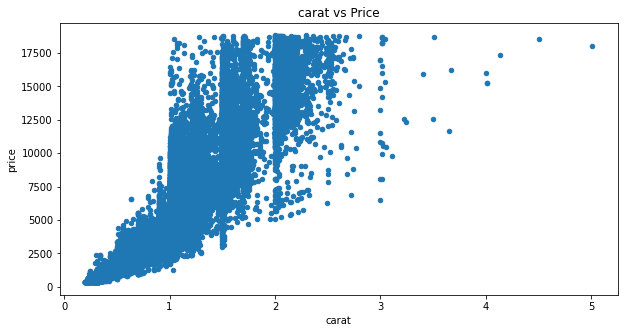

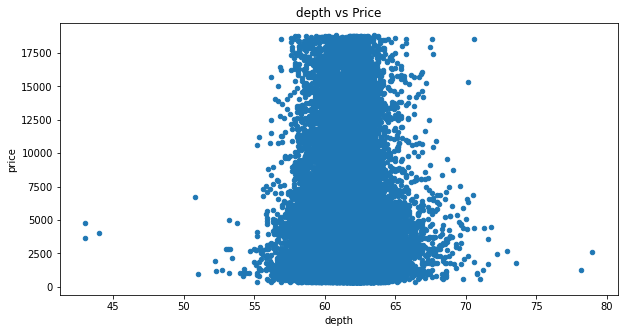

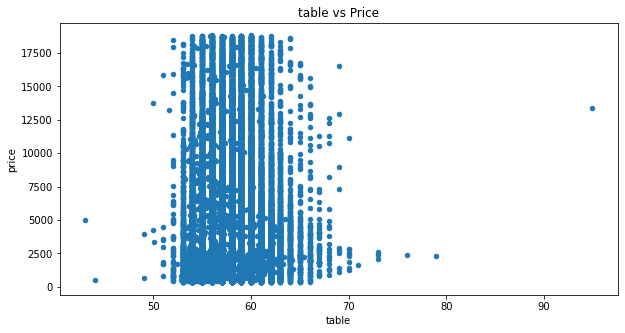

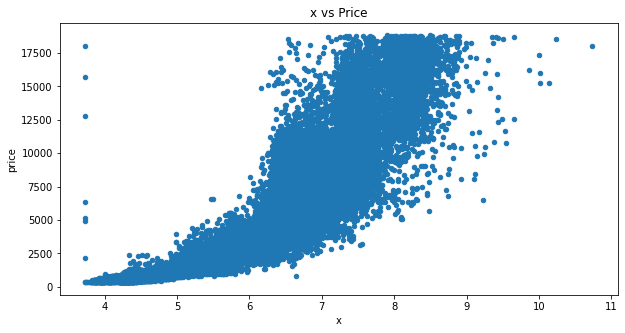

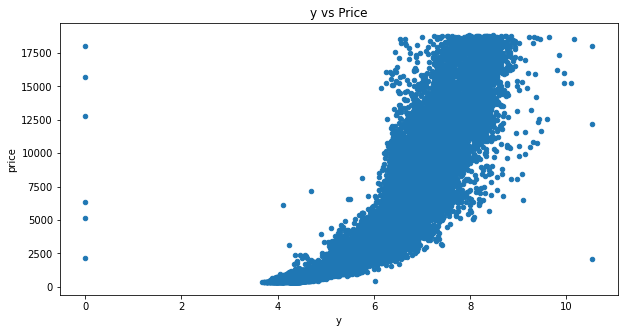

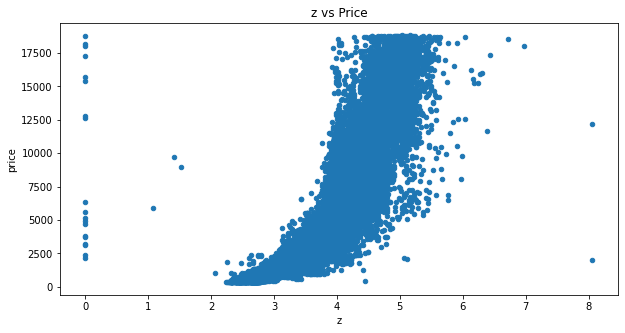

In [17]:
def scatter_plot(df,cols):
    %matplotlib inline
    for i in cols:
        df.plot.scatter(x=i,y='price',figsize=(10,5),title=i +" vs Price")

scatter_plot(DiamondPrice,['carat','depth','table','x','y','z'])

In [9]:
# Removing the Outliars From X,Y,Z

DiamondPrice=DiamondPrice[(DiamondPrice['y']>2)&(DiamondPrice['y']<9.5)]


In [10]:
DiamondPrice=DiamondPrice[(DiamondPrice['z']>2.06)&(DiamondPrice['y']<6.5)]


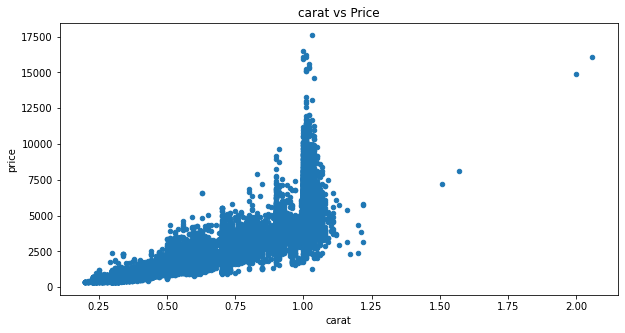

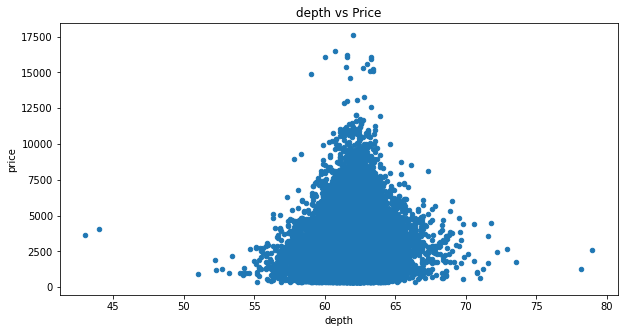

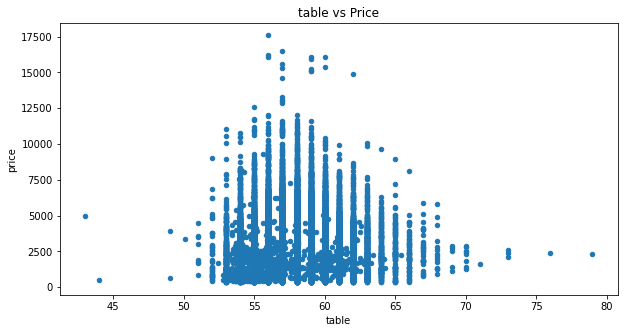

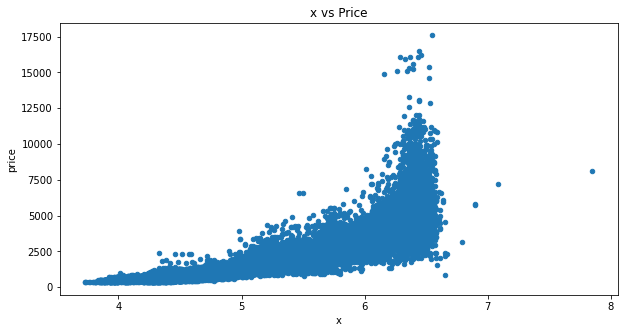

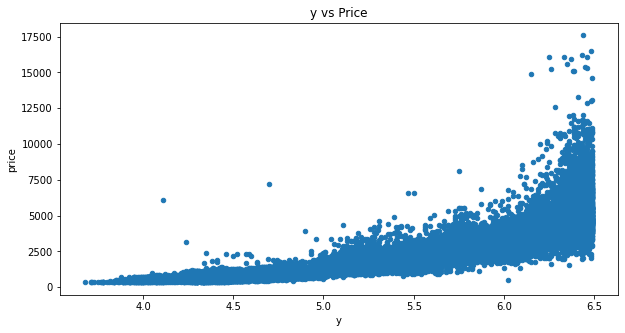

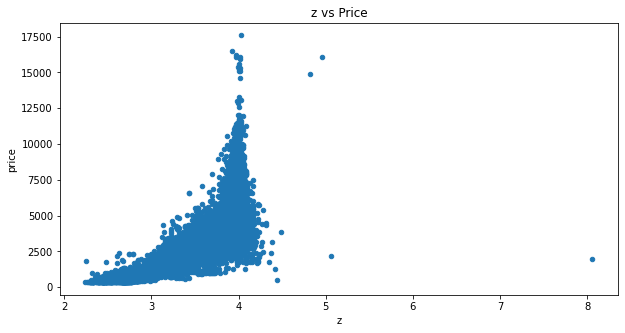

In [20]:
scatter_plot(DiamondPrice,['carat','depth','table','x','y','z'])

In [11]:
DiamondPrice.corr()['price'][abs(DiamondPrice.corr()['price'])>0.5]

price    1.000000
carat    0.891041
x        0.863223
y        0.863745
z        0.862074
Name: price, dtype: float64

* Features selected :- carat,X,y,z

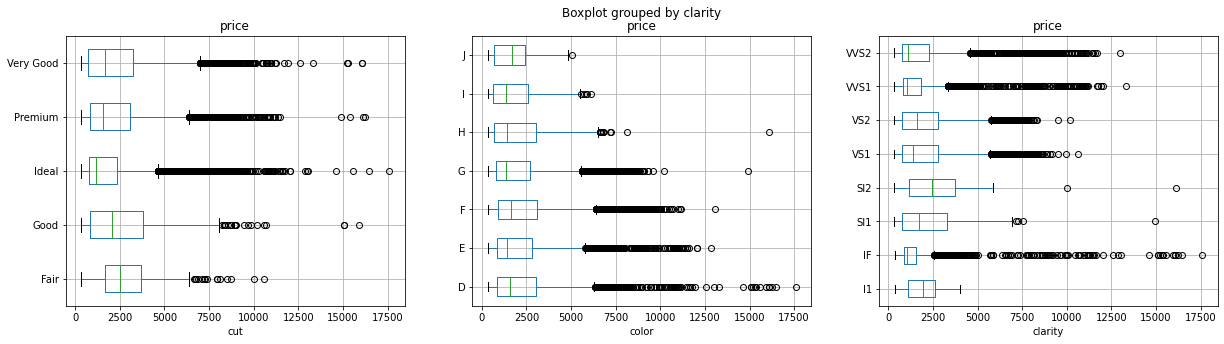

In [22]:
# Categorical vs contious
categ=['cut','color','clarity']
fig,subplot=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
fig.suptitle("BoxPlot for categorical variables "+str(categ))

for i,j in zip(categ,range(len(categ))):
    DiamondPrice.boxplot(column='price',by=i,ax=subplot[j],vert=False)


In [23]:
bb=DiamondPrice.groupby('cut')['price'].apply(list)
bb

cut
Fair         [337, 2757, 2759, 2762, 2762, 2763, 2763, 2777...
Good         [327, 335, 339, 351, 351, 351, 402, 402, 402, ...
Ideal        [326, 340, 344, 348, 403, 403, 403, 404, 404, ...
Premium      [326, 334, 342, 345, 345, 355, 403, 404, 404, ...
Very Good    [336, 336, 337, 338, 351, 352, 353, 353, 353, ...
Name: price, dtype: object

In [24]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [25]:
FunctionAnova(DiamondPrice,'price',categ)

##### ANOVA Results ##### 

cut is correlated with price | P-Value: 2.3648343981012946e-214
color is correlated with price | P-Value: 8.844490834752758e-53
clarity is correlated with price | P-Value: 3.1326646781559974e-135


['cut', 'color', 'clarity']

* Categorical Selected :- Cut ,Color,Clarity
* Contnuous Selected :- Carat,X,Y,Z

### Extracting the Selected Predictors 

In [26]:
Predictors=['carat','x', 'y','z','cut', 'color', 'clarity']
Target='price'

DiamondDataML=DiamondPrice[Predictors]
DiamondDataML[Target]=DiamondPrice[Target]
DiamondDataML.head()

,carat,x,y,z,cut,color,clarity,price
0,0.23,3.95,3.98,2.43,Ideal,E,SI2,326
1,0.21,3.89,3.84,2.31,Premium,E,SI1,326
2,0.23,4.05,4.07,2.31,Good,E,VS1,327
3,0.29,4.20,4.23,2.63,Premium,I,VS2,334
4,0.31,4.34,4.35,2.75,Good,J,SI2,335


### Preparing data for ML
* <h4>Converting Categorical Features to Numerical

In [27]:
DiamondDataML['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [28]:
# Replacing Ordinal Category
DiamondDataML.replace({'Good':1, 
                          'Very Good':2,
                          'Fair':3,
                          'Ideal':4,
                          'Premium':5
                         }, inplace=True)

In [31]:
DiamondDataML['color'].unique()
# Replace as Per Lowest to highest grade D>>J

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [32]:
DiamondDataML.replace({'J':1,
                       'I':2,
                       'H':3,
                       'G':4,
                       'F':5,
                       'E':6,
                       'D':7},inplace=True)

In [33]:
DiamondDataML['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [34]:
# Replacing In order of Lowest to Higest Clarity Index "I1<<VVS2"
DiamondDataML.replace({'I1':1,
          'SI1':2,
          'SI2':3,
          'VS1':4,
          'VS2':5,
          'VVS1':6,
          'VVS2':7,
          'IF':8}, inplace=True)

In [35]:
DiamondDataML.head()

,carat,x,y,z,cut,color,clarity,price
0,0.23,3.95,3.98,2.43,4,6,3,326
1,0.21,3.89,3.84,2.31,5,6,2,326
2,0.23,4.05,4.07,2.31,1,6,4,327
3,0.29,4.20,4.23,2.63,5,2,5,334
4,0.31,4.34,4.35,2.75,1,1,3,335


* <h4>Splitting Data Into Train/Test

In [36]:
from sklearn.model_selection import train_test_split


X=DiamondDataML[Predictors].values
y=DiamondDataML[Target].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27584, 7)
(11823, 7)
(27584,)
(11823,)


* <h4>Standardization/Normalization of Data (Optional)

In [39]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X=MinMaxScaler().fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=32)

In [40]:
X_train

array([[0.05913978, 0.15776699, 0.23487544, ..., 1.        , 0.66666667,
        0.57142857],
       [0.06989247, 0.16262136, 0.2633452 , ..., 0.75      , 0.5       ,
        0.42857143],
       [0.07526882, 0.17475728, 0.28825623, ..., 0.75      , 0.16666667,
        0.14285714],
       ...,
       [0.05376344, 0.12135922, 0.18505338, ..., 0.25      , 0.5       ,
        0.85714286],
       [0.38709677, 0.60194175, 0.92882562, ..., 0.25      , 1.        ,
        0.42857143],
       [0.02150538, 0.05825243, 0.113879  , ..., 0.25      , 0.66666667,
        0.71428571]])

### Multiple Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

LR=LinearRegression()
LR.fit(X_train,y_train)


print("R2 score of Fitted model is :-",metrics.r2_score(y_train,LR.predict(X_train)))
print("Coef:-",LR.coef_,"\nIntercept :-",LR.intercept_)
print('------------------------------------------------------------------------------')

predLR=LR.predict(X_test)

# Storing Test Results
TestScoreLR=pd.DataFrame(X_test,columns=Predictors)
TestScoreLR[Target]=y_test
TestScoreLR[Target+'_Predicted']=predLR

# APE (Absolute Percentage Error)
TestScoreLR['APE']=(np.abs(TestScoreLR[Target]-TestScoreLR[Target+'_Predicted'])/TestScoreLR[Target])*100

# MAPE (Mean Absolute Percentage Error)
MAPE=TestScoreLR['APE'].mean()
# Median APE
MedAPE=TestScoreLR['APE'].median()

print(TestScoreLR[[Target,Target+'_Predicted','APE']])
print('------------------------------------------------------------------------------')
print("Mean Accuracy of Model is :- ",round(100-MAPE,2),'%')
print("Median Accuracy of Model is :- ",round(100-MedAPE,2),'%')


R2 score of Fitted model is :- 0.8697328187886078
Coef:- [23414.00030292 -7663.69206987  2032.89018685 -7853.51955202
   196.91175149   886.12756503  1350.01593189] 
Intercept :- -911.5104035629888
------------------------------------------------------------------------------
       price  price_Predicted         APE
0       1074       741.946348   30.917472
1       4311      3340.505588   22.512049
2       4029      3401.218568   15.581569
3       1862      2258.809112   21.310908
4        523      -282.595668  154.033588
...      ...              ...         ...
11818   2196      1935.361834   11.868769
11819    973       993.339785    2.090420
11820   1787      1881.393985    5.282260
11821   1200      1093.532784    8.872268
11822    695       368.408726   46.991550

[11823 rows x 3 columns]
------------------------------------------------------------------------------
Mean Accuracy of Model is :-  75.36 %
Median Accuracy of Model is :-  83.53 %


#### Cross Validating Model

In [46]:
def MAPE_score(orig,pred):
    APE=(np.abs(orig-pred)/orig)*100
    MAPE=np.mean(APE)
    return 100-MAPE

# Making Custom Scoring
scorer=make_scorer(MAPE_score,greater_is_better=True)

CV=cross_val_score(LR,X,y,cv=10,scoring=scorer)
print(CV)
print("Final Mean Accuracy of Model is :-",round(np.mean(CV),2),'%')


[78.17498772 79.23979082 79.24120828 63.57621642 62.10393173 67.23444721
 71.96638499 77.24177035 79.18203961 81.93274705]
Final Mean Accuracy of Model is :- 73.99 %


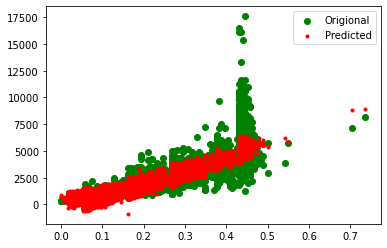

In [63]:
import matplotlib.pyplot as plt
plt.scatter(x=TestScoreLR['carat'],y=TestScoreLR['price'],color='green',marker='o')
plt.scatter(x=TestScoreLR['carat'],y=TestScoreLR['price_Predicted'],color='red',marker='.')
plt.legend(['Origional','Predicted'])



### Decision Tree Regressor

R2 score of Fitted Model is :-  0.9816942656051234
------------------------------------------------------------------------------
       price  price_predicted        APE
0       1074      1028.826667   4.206083
1       4311      3347.533333  22.349030
2       4029      3546.666667  11.971540
3       1862      1892.962547   1.662865
4        523       522.615385   0.073540
...      ...              ...        ...
11818   2196      2366.189189   7.749963
11819    973      1028.826667   5.737581
11820   1787      1911.038278   6.941146
11821   1200      1204.259740   0.354978
11822    695       752.327434   8.248552

[11823 rows x 3 columns]
------------------------------------------------------------------------------
Mean Accuracy of Model is  :-  90.99 %
Median Accuracy of Model is :- 92.82 %
Feature Importances :- 



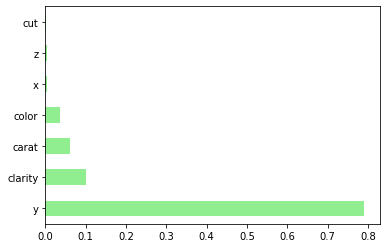

[82.73256071 84.74436182 82.58730959 82.27248844 83.01371479 85.23767554
 83.56862041 84.52318171 85.26691164 84.72014399]
Final Mean Accuracy of Model is :-  83.87 %


In [81]:
from sklearn.tree import DecisionTreeRegressor

DT=DecisionTreeRegressor(max_depth=10,criterion='mse')
DT.fit(X_train,y_train)

print("R2 score of Fitted Model is :- ",metrics.r2_score(y_train,DT.predict(X_train)))
print('------------------------------------------------------------------------------')
predDT=DT.predict(X_test)

TestScoreDT=pd.DataFrame(X_test,columns=Predictors)
TestScoreDT[Target]=y_test
TestScoreDT[Target+'_predicted']=predDT
TestScoreDT['APE']=(np.abs(TestScoreDT['price']-TestScoreDT['price_predicted'])/TestScoreLR['price'])*100

MAPE=TestScoreDT['APE'].mean()

MedAPE=TestScoreDT['APE'].median()
print(TestScoreDT[['price','price_predicted','APE']])
print('------------------------------------------------------------------------------')
print("Mean Accuracy of Model is  :- ",round(100-MAPE,2),'%')
print("Median Accuracy of Model is :-",round(100-MedAPE,2),'%')

# Plotting The Feature Imporatances
print("Feature Importances :- \n")
features=pd.Series(DT.feature_importances_,index=Predictors)
features.nlargest(10).plot(kind='barh',color='lightgreen')
plt.show()

# ---------------------------------------------------------------------------------------------
# Cross Validation of Model
scorerDT=make_scorer(MAPE_score,greater_is_better=True)
CV=cross_val_score(DT,X,y,cv=10,scoring=scorerDT)
print(CV)
print("Final Mean Accuracy of Model is :- ",round(np.mean(CV),2),'%')

#### Plotting Decision Tree (Optional as Trees are too big to plot)

In [ ]:
from IPython.display import Image
import pydotplus
from sklearn import tree

dot_data=tree.export_graphviz(DT,out_file=None,feature_names=Predictors,class_names=Target)

tree=pydotplus.graph_from_dot_data(dot_data)

# print(dot_data)



In [ ]:
Image(tree.create_png(),width=100000,height=100000)

In [ ]:
# fig=plt.gcf()
# fig.savefig('diamondtree.png')

### Dimensionality Reduction using PCA

In [19]:
from sklearn.decomposition import PCA

pca=PCA(n_components=20)

pca.fit_transform(pd.get_dummies(DiamondPrice.drop('price',axis=1)).values)
explained_variance=pca.explained_variance_ratio_

explained_variance=np.cumsum(explained_variance)*100
explained_variance

array([50.2970856 , 67.97690527, 79.1497259 , 81.46788156, 83.61735303,
       85.67724999, 87.66062439, 89.53335423, 91.25661343, 92.74986317,
       94.09725024, 95.37142211, 96.36993049, 97.30879657, 98.12119912,
       98.86589345, 99.27073152, 99.6080649 , 99.88666277, 99.97026362])

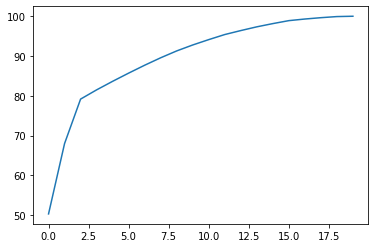

In [20]:
plt.plot(explained_variance)

In [21]:
# generating 15 pca components

pca=PCA(n_components=15)
pca_comp=pca.fit_transform(pd.get_dummies(DiamondPrice.drop('price',axis=1)).values)
X=pca_comp
y=DiamondPrice['price'].values
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# mm=MinMaxScaler()
# Any one
ss=StandardScaler()
# X=mm.fit_transform(X)
X=ss.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

### Multiple Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()

LR.fit(X_train,y_train)

print("Coef:-",LR.coef_,"\nIntercept",LR.intercept_)
from sklearn import metrics

print("R^2 Score id  :- ",metrics.r2_score(y_train,LR.predict(X_train)))

pred=LR.predict(X_test)



# APE 
APE=(abs(y_test-pred)/y_test)*100
# MAPE
MAPE=np.mean(APE)
# Median APE
MedAPE=np.median(APE)



print("Mean Accuracy :-",(100-MAPE))
print("Median Accuracy :-",(100-MedAPE))

# Defining custom Scorer function
def Mape_scorer(origional,pred):
    ape=(abs(origional-pred)/origional)*100
    mape=np.mean(ape)
    return(100-mape)

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

scorer=make_scorer(Mape_scorer,greater_is_better=True)

Cross_val=cross_val_score(LR,X,y,cv=10,scoring=scorer)

print("Results For Cross Validation :",Cross_val)
print("Final Average accuracy is :",round(np.mean(Cross_val),2))
print("Final Median Accuracy is :",round(np.median(Cross_val),2))


Coef:- [  284.08827955   830.69765139 -1179.56384588    84.68580516
   -92.67602055    41.1881394     42.7929643    -23.84354988
    31.67826791   -28.48117951    40.01317332   -92.3535368
   249.72909173    54.3666571     80.30055608] 
Intercept 2078.6721134138784
R^2 Score id  :-  0.7699514844308928
Mean Accuracy :- 64.3105491299521
Median Accuracy :- 74.15219240864378
Results For Cross Validation : [74.8419032  85.14881186 68.62798109 55.67538493 48.33009878 50.29048801
 53.71165376 59.23741933 60.78187781 65.83597732]
Final Average accuracy is : 62.25
Final Median Accuracy is : 60.01
